<a href="https://colab.research.google.com/github/forloulhoucine/Projet_App_Supervise_Donnees_Relationelles/blob/main/Projet_Apprentissage%20supervis%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projet Apprentissage supervisé MLDS M2
*  Houcine FORLOUL
*  Ridha Tigoulmamine 

#**2. Données relationnelles :**

#**Import Libraries**

In [ ]:
#libraries 
import numpy as np
import pandas as pd
import random as rd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.io
#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import  normalized_mutual_info_score as NMI
%matplotlib inline
#algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier
#preprocessing 
from sklearn.preprocessing import StandardScaler
#model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#**Présentation du jeu de données**


1.  **Cora :**
L'ensemble de données Cora comprend 2708 publications scientifiques classées
dans l'une des sept classes. Le réseau de citations comprend 5429 liens. Chaque
publication dans l'ensemble de données est décrite par un vecteur de mot de valeur 0/1
indiquant l'absence / la présence du mot correspondant dans le dictionnaire. Le dictionnaire
se compose de 1433 mots uniques.

2. **CiteSeer :**
CiteSeer comprend 3312 publications scientifiques classées dans l'une des six
classes. Le réseau de citations se compose de 4732 liens. Chaque publication dans
l'ensemble de données est décrite par un vecteur de mot de valeur 0/1 indiquant l'absence /
la présence du mot correspondant dans le dictionnaire. Le dictionnaire se compose de 3703 mots uniques.

3. **Pubmed :**
chaque publication de l'ensemble de données est décrite par un vecteur de mots
pondéré TF / IDF du dictionnaire. Les relations de citation sont utilisées pour construire les
structures du réseau.




*  **fea** : la matrice X(n,d) où n est le nombre d’individus, d est le nombre de variable  
*  **W**: la matrice d’adjacence (des liens entre les individus) W(n,n)
*  **gnd** : vecteur des labels (classes).

#**Démarche suivie :** 

Pour chaque jeu de données on fait les étapes suivantes :
*  Preparer la matrice X et calculer la combinaison des informations M=D^(-1)*W*X et séparer les données en train et test.
*  Appliquer sur les deux matrices X et M les differentes algorithme d’apprentissage supervisé (Bayesien Naïf, KNN, LDA, QDA, Linear SVM, Non Linear SVM, Régression logistique, CART, Random Forest, Gradient Boosting, Xgboost et
Adaboost)
* Afficher aprés chaque methode la matrice de confusion avec les metriques Accuracy, NMI et F-mesure
* Ploter les metriques de tous les algorithmes dans un barplot et commenter les résultats obtenus

#**CORA**

##Read and prepare Data 

In [ ]:
cora=scipy.io.loadmat('cora.mat')

In [ ]:
#l’information contenue dans la matrice X
coraX=cora["fea"]
coraY=np.concatenate(cora["gnd"])
coraW=cora["W"]
x_train,x_test,y_train,y_test=train_test_split(coraX,coraY,test_size=0.2,random_state=20)

In [ ]:
#M=D^(-1)*W*X
D=np.zeros((coraW.shape[0],coraW.shape[0]))
for i in range(coraW.shape[0]):
  D[i][i]=1/coraW[i].sum()
coraM=np.matmul(np.matmul(D,coraW),coraX)
x_trainM,x_testM,y_trainM,y_testM=train_test_split(coraM,coraY,test_size=0.2,random_state=20)

In [ ]:
#Metrics for both X-data and M-data
cora_metricsX=pd.DataFrame(columns=["method","ACCURACY","NMI","F-measure"])
cora_metricsM=pd.DataFrame(columns=["method","ACCURACY","NMI","F-measure"])

## Bayesien Naïf

In [ ]:
#X(fea)
clf_nb = BernoulliNB()
clf_nb.fit(x_train,y_train)
y_pred = clf_nb.predict(x_test)
nb_ac=accuracy_score(y_test,y_pred)
nb_f1=f1_score(y_test,y_pred,average="macro")
nb_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"Bayesien Naïf","ACCURACY":nb_ac,"NMI":nb_nmi,"F-measure":nb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_nbM = BernoulliNB()
clf_nbM.fit(x_trainM,y_trainM)
y_predM = clf_nbM.predict(x_testM)
nb_acM=accuracy_score(y_testM,y_predM)
nb_f1M=f1_score(y_testM,y_predM,average="macro")
nb_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"Bayesien Naïf","ACCURACY":nb_acM,"NMI":nb_nmiM,"F-measure":nb_f1M},ignore_index=True)

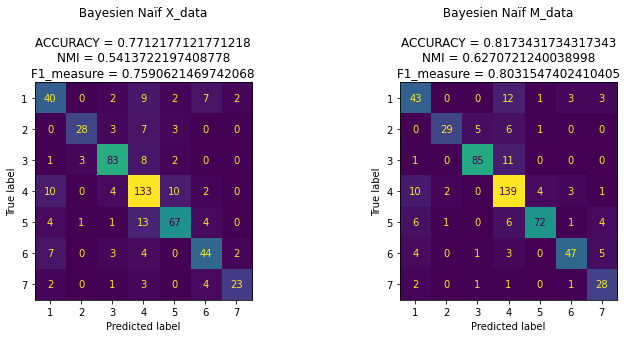

In [ ]:
#Confusion matrix  Bayesien Naïf
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title(" Bayesien Naïf X_data \n\n"+"ACCURACY = "+str(nb_ac)+"\nNMI = "+str(nb_nmi)+"\nF1_measure = "+str(nb_f1))
axes[1].set_title(" Bayesien Naïf M_data \n\n"+"ACCURACY = "+str(nb_acM)+"\nNMI = "+str(nb_nmiM)+"\nF1_measure = "+str(nb_f1M))
plot_confusion_matrix(clf_nb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_nbM,x_testM,y_testM,ax=axes[1],colorbar=False)

## KNN

In [ ]:
#X(fea)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(x_train,y_train)
y_pred = clf_knn.predict(x_test)
knn_ac=accuracy_score(y_test,y_pred)
knn_f1=f1_score(y_test,y_pred,average="macro")
knn_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"KNN","ACCURACY":knn_ac,"NMI":knn_nmi,"F-measure":knn_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_knnM = KNeighborsClassifier(n_neighbors=5)
clf_knnM.fit(x_trainM,y_trainM)
y_predM = clf_knnM.predict(x_testM)
knn_acM=accuracy_score(y_testM,y_predM)
knn_f1M=f1_score(y_testM,y_predM,average="macro")
knn_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"KNN","ACCURACY":knn_acM,"NMI":knn_nmiM,"F-measure":knn_f1M},ignore_index=True)

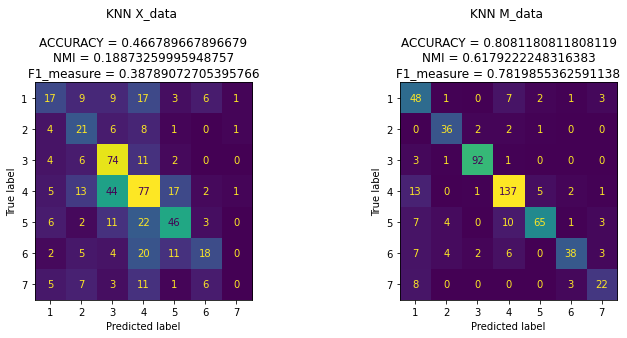

In [ ]:
#Confusion matrix knn
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("KNN X_data \n\n"+"ACCURACY = "+str(knn_ac)+"\nNMI = "+str(knn_nmi)+"\nF1_measure = "+str(knn_f1))
axes[1].set_title("KNN M_data \n\n"+"ACCURACY = "+str(knn_acM)+"\nNMI = "+str(knn_nmiM)+"\nF1_measure = "+str(knn_f1M))
plot_confusion_matrix(clf_knn,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_knnM,x_testM,y_testM,ax=axes[1],colorbar=False)

## LDA

In [ ]:
#X(fea)
clf_lda = LDA()
clf_lda.fit(x_train,y_train)
y_pred = clf_lda.predict(x_test)
lda_ac=accuracy_score(y_test,y_pred)
lda_f1=f1_score(y_test,y_pred,average="macro")
lda_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"LDA","ACCURACY":lda_ac,"NMI":lda_nmi,"F-measure":lda_f1},ignore_index=True)
print("Accuracy = "+str(lda_ac),"\tNMI = "+str(lda_nmi),"\tF1_measure = "+str(lda_f1))

Accuracy = 0.6383763837638377 	NMI = 0.3517927213782164 	F1_measure = 0.6105693840321672


In [ ]:
#M=D^(-1)*W*X
clf_ldaM = LDA()
clf_ldaM.fit(x_trainM,y_trainM)
y_predM = clf_ldaM.predict(x_testM)
lda_acM=accuracy_score(y_testM,y_predM)
lda_f1M=f1_score(y_testM,y_predM,average="macro")
lda_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"LDA","ACCURACY":lda_acM,"NMI":lda_nmiM,"F-measure":lda_f1M},ignore_index=True)
print("Accuracy = "+str(lda_acM),"\tNMI = "+str(lda_nmiM),"\tF1_measure = "+str(lda_f1M))

Accuracy = 0.7380073800738007 	NMI = 0.5011135978585416 	F1_measure = 0.721334146261783


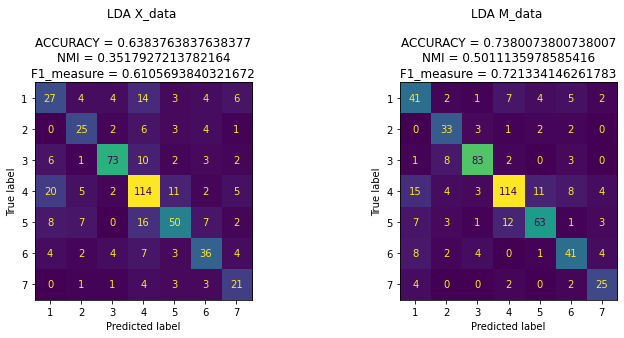

In [ ]:
#Confusion matrix lda
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("LDA X_data \n\n"+"ACCURACY = "+str(lda_ac)+"\nNMI = "+str(lda_nmi)+"\nF1_measure = "+str(lda_f1))
axes[1].set_title("LDA M_data \n\n"+"ACCURACY = "+str(lda_acM)+"\nNMI = "+str(lda_nmiM)+"\nF1_measure = "+str(lda_f1M))
plot_confusion_matrix(clf_lda,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_ldaM,x_testM,y_testM,ax=axes[1],colorbar=False)

## QDA

In [ ]:
#X(fea)
clf_qda = QDA()
clf_qda.fit(x_train,y_train)
y_pred = clf_qda.predict(x_test)
qda_ac=accuracy_score(y_test,y_pred)
qda_f1=f1_score(y_test,y_pred,average="macro")
qda_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"QDA","ACCURACY":qda_ac,"NMI":qda_nmi,"F-measure":qda_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_qdaM = QDA()
clf_qdaM.fit(x_trainM,y_trainM)
y_predM = clf_qdaM.predict(x_testM)
qda_acM=accuracy_score(y_testM,y_predM)
qda_f1M=f1_score(y_testM,y_predM,average="macro")
qda_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"QDA","ACCURACY":qda_acM,"NMI":qda_nmiM,"F-measure":qda_f1M},ignore_index=True)

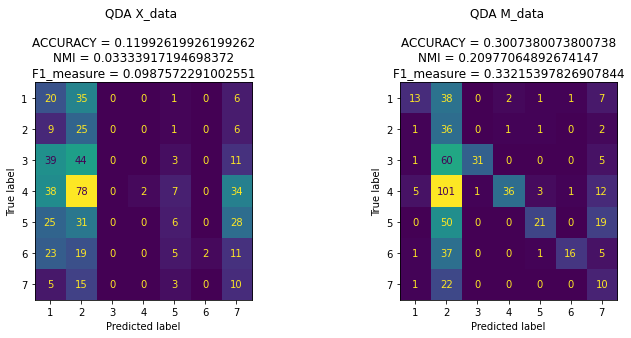

In [ ]:
#Confusion matrix qda
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("QDA X_data \n\n"+"ACCURACY = "+str(qda_ac)+"\nNMI = "+str(qda_nmi)+"\nF1_measure = "+str(qda_f1))
axes[1].set_title("QDA M_data \n\n"+"ACCURACY = "+str(qda_acM)+"\nNMI = "+str(qda_nmiM)+"\nF1_measure = "+str(qda_f1M))
plot_confusion_matrix(clf_qda,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_qdaM,x_testM,y_testM,ax=axes[1],colorbar=False)

## Linear SVM

In [ ]:
#X(fea)
clf_l_svm = svm.LinearSVC()
clf_l_svm.fit(x_train,y_train)
y_pred = clf_l_svm.predict(x_test)
l_svm_ac=accuracy_score(y_test,y_pred)
l_svm_f1=f1_score(y_test,y_pred,average="macro")
l_svm_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"Linear SVM","ACCURACY":l_svm_ac,"NMI":l_svm_nmi,"F-measure":l_svm_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_l_svmM = svm.LinearSVC()
clf_l_svmM.fit(x_trainM,y_trainM)
y_predM = clf_l_svmM.predict(x_testM)
l_svm_acM=accuracy_score(y_testM,y_predM)
l_svm_f1M=f1_score(y_testM,y_predM,average="macro")
l_svm_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"Linear SVM","ACCURACY":l_svm_acM,"NMI":l_svm_nmiM,"F-measure":l_svm_f1M},ignore_index=True)

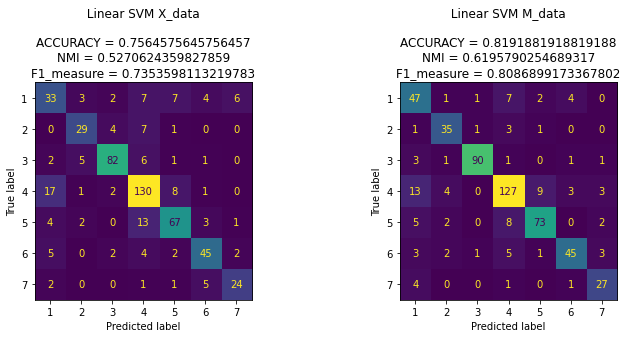

In [ ]:
#Confusion matrix  Linear SVM
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title(" Linear SVM X_data \n\n"+"ACCURACY = "+str(l_svm_ac)+"\nNMI = "+str(l_svm_nmi)+"\nF1_measure = "+str(l_svm_f1))
axes[1].set_title(" Linear SVM M_data \n\n"+"ACCURACY = "+str(l_svm_acM)+"\nNMI = "+str(l_svm_nmiM)+"\nF1_measure = "+str(l_svm_f1M))
plot_confusion_matrix(clf_l_svm,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_l_svmM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Non Linear SVM

In [ ]:
#X(fea)
clf_nl_svm = svm.SVC(C=100,gamma=0.001,kernel='rbf')
clf_nl_svm.fit(x_train,y_train)
y_pred = clf_nl_svm.predict(x_test)
nl_svm_ac=accuracy_score(y_test,y_pred)
nl_svm_f1=f1_score(y_test,y_pred,average="macro")
nl_svm_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"Non Linear SVM","ACCURACY":nl_svm_ac,"NMI":nl_svm_nmi,"F-measure":nl_svm_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_nl_svmM = svm.SVC(C=100,gamma=0.001,kernel='rbf')
clf_nl_svmM.fit(x_trainM,y_trainM)
y_predM = clf_nl_svmM.predict(x_testM)
nl_svm_acM=accuracy_score(y_testM,y_predM)
nl_svm_f1M=f1_score(y_testM,y_predM,average="macro")
nl_svm_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"Non Linear SVM","ACCURACY":nl_svm_acM,"NMI":nl_svm_nmiM,"F-measure":nl_svm_f1M},ignore_index=True)

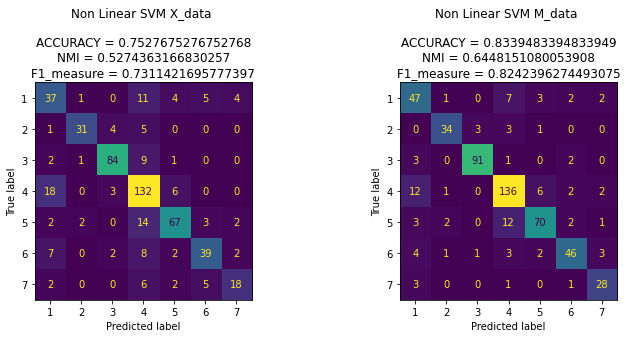

In [ ]:
#Confusion matrix Non Linear SVM
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Non Linear SVM X_data \n\n"+"ACCURACY = "+str(nl_svm_ac)+"\nNMI = "+str(nl_svm_nmi)+"\nF1_measure = "+str(nl_svm_f1))
axes[1].set_title("Non Linear SVM M_data \n\n"+"ACCURACY = "+str(nl_svm_acM)+"\nNMI = "+str(nl_svm_nmiM)+"\nF1_measure = "+str(nl_svm_f1M))
plot_confusion_matrix(clf_nl_svm,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_nl_svmM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Logistic Regression

In [ ]:
#X(fea)
clf_lr = LogisticRegression()
clf_lr.fit(x_train,y_train)
y_pred = clf_lr.predict(x_test)
lr_ac=accuracy_score(y_test,y_pred)
lr_f1=f1_score(y_test,y_pred,average="macro")
lr_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"Logistic Regression","ACCURACY":lr_ac,"NMI":lr_nmi,"F-measure":lr_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_lrM = LogisticRegression()
clf_lrM.fit(x_trainM,y_trainM)
y_predM = clf_lrM.predict(x_testM)
lr_acM=accuracy_score(y_testM,y_predM)
lr_f1M=f1_score(y_testM,y_predM,average="macro")
lr_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"Logistic Regression","ACCURACY":lr_acM,"NMI":lr_nmiM,"F-measure":lr_f1M},ignore_index=True)

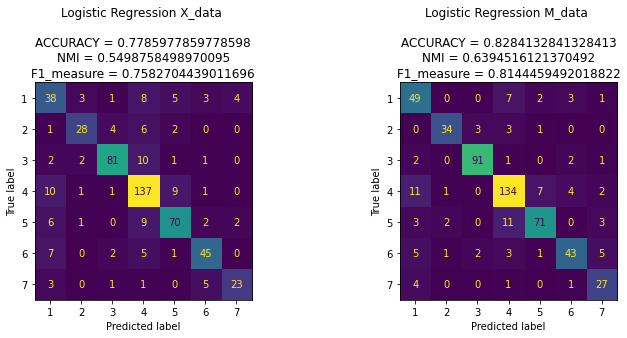

In [ ]:
#Confusion matrix Logistic Regression
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Logistic Regression X_data \n\n"+"ACCURACY = "+str(lr_ac)+"\nNMI = "+str(lr_nmi)+"\nF1_measure = "+str(lr_f1))
axes[1].set_title("Logistic Regression M_data \n\n"+"ACCURACY = "+str(lr_acM)+"\nNMI = "+str(lr_nmiM)+"\nF1_measure = "+str(lr_f1M))
plot_confusion_matrix(clf_lr,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_lrM,x_testM,y_testM,ax=axes[1],colorbar=False)

##CART

In [ ]:
#X(fea)
clf_cart = DecisionTreeClassifier()
clf_cart.fit(x_train,y_train)
y_pred = clf_cart.predict(x_test)
cart_ac=accuracy_score(y_test,y_pred)
cart_f1=f1_score(y_test,y_pred,average="macro")
cart_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"CART","ACCURACY":cart_ac,"NMI":cart_nmi,"F-measure":cart_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_cartM = DecisionTreeClassifier()
clf_cartM.fit(x_trainM,y_trainM)
y_predM = clf_cartM.predict(x_testM)
cart_acM=accuracy_score(y_testM,y_predM)
cart_f1M=f1_score(y_testM,y_predM,average="macro")
cart_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"CART","ACCURACY":cart_acM,"NMI":cart_nmiM,"F-measure":cart_f1M},ignore_index=True)

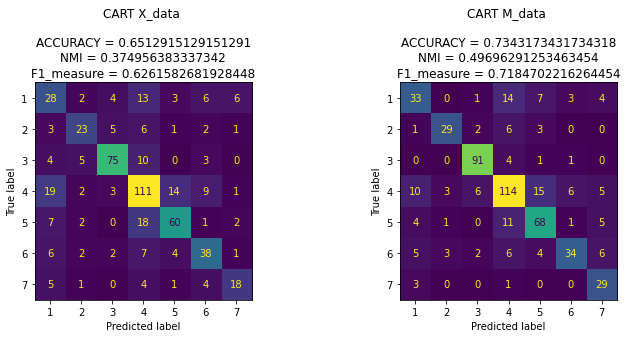

In [ ]:
#Confusion matrix Logistic Regression
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("CART X_data \n\n"+"ACCURACY = "+str(cart_ac)+"\nNMI = "+str(cart_nmi)+"\nF1_measure = "+str(cart_f1))
axes[1].set_title("CART M_data \n\n"+"ACCURACY = "+str(cart_acM)+"\nNMI = "+str(cart_nmiM)+"\nF1_measure = "+str(cart_f1M))
plot_confusion_matrix(clf_cart,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_cartM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Random Forest

In [ ]:
#X(fea)
clf_rf = RandomForestClassifier(max_depth=100, random_state=0)
clf_rf.fit(x_train,y_train)
y_pred = clf_rf.predict(x_test)
rf_ac=accuracy_score(y_test,y_pred)
rf_f1=f1_score(y_test,y_pred,average="macro")
rf_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"Random Forest","ACCURACY":rf_ac,"NMI":rf_nmi,"F-measure":rf_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_rfM = RandomForestClassifier(max_depth=100, random_state=0)
clf_rfM.fit(x_trainM,y_trainM)
y_predM = clf_rfM.predict(x_testM)
rf_acM=accuracy_score(y_testM,y_predM)
rf_f1M=f1_score(y_testM,y_predM,average="macro")
rf_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"Random Forest","ACCURACY":rf_acM,"NMI":rf_nmiM,"F-measure":rf_f1M},ignore_index=True)

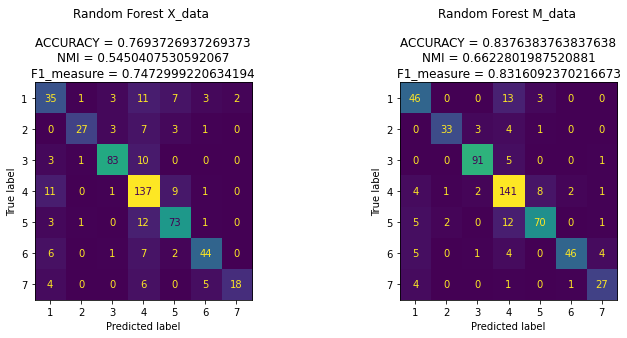

In [ ]:
#Confusion matrix Random Forest
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Random Forest X_data \n\n"+"ACCURACY = "+str(rf_ac)+"\nNMI = "+str(rf_nmi)+"\nF1_measure = "+str(rf_f1))
axes[1].set_title("Random Forest M_data \n\n"+"ACCURACY = "+str(rf_acM)+"\nNMI = "+str(rf_nmiM)+"\nF1_measure = "+str(rf_f1M))
plot_confusion_matrix(clf_rf,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_rfM,x_testM,y_testM,ax=axes[1],colorbar=False)

## Gradient Boosting

In [ ]:
#X(fea)
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf_gb.fit(x_train,y_train)
y_pred = clf_gb.predict(x_test)
gb_ac=accuracy_score(y_test,y_pred)
gb_f1=f1_score(y_test,y_pred,average="macro")
gb_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"Gradient Boosting","ACCURACY":gb_ac,"NMI":gb_nmi,"F-measure":gb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_gbM = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf_gb.fit(x_train,y_train)
clf_gbM.fit(x_trainM,y_trainM)
y_predM = clf_gbM.predict(x_testM)
gb_acM=accuracy_score(y_testM,y_predM)
gb_f1M=f1_score(y_testM,y_predM,average="macro")
gb_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"Gradient Boosting","ACCURACY":gb_acM,"NMI":gb_nmiM,"F-measure":gb_f1M},ignore_index=True)

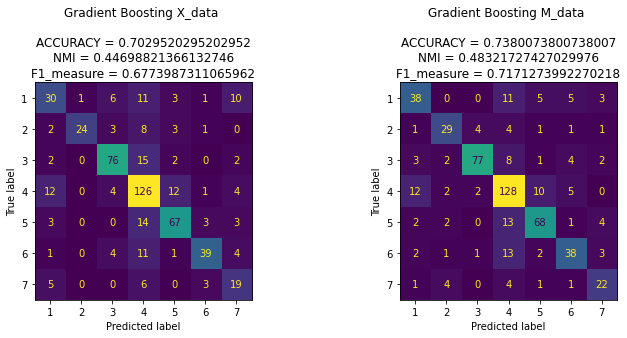

In [ ]:
#Confusion matrix Gradient Boosting
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Gradient Boosting X_data \n\n"+"ACCURACY = "+str(gb_ac)+"\nNMI = "+str(gb_nmi)+"\nF1_measure = "+str(gb_f1))
axes[1].set_title("Gradient Boosting M_data \n\n"+"ACCURACY = "+str(gb_acM)+"\nNMI = "+str(gb_nmiM)+"\nF1_measure = "+str(gb_f1M))
plot_confusion_matrix(clf_gb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_gbM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Xgboost

In [ ]:
#X(fea)
clf_xgb = xgboost.XGBClassifier(n_jobs=1)
clf_xgb.fit(x_train,y_train)
y_pred = clf_xgb.predict(x_test)
xgb_ac=accuracy_score(y_test,y_pred)
xgb_f1=f1_score(y_test,y_pred,average="macro")
xgb_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"Xgboost","ACCURACY":xgb_ac,"NMI":xgb_nmi,"F-measure":xgb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_xgbM = xgboost.XGBClassifier(n_jobs=1)
clf_xgbM.fit(x_trainM,y_trainM)
y_predM = clf_gbM.predict(x_testM)
xgb_acM=accuracy_score(y_testM,y_predM)
xgb_f1M=f1_score(y_testM,y_predM,average="macro")
xgb_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"Xgboost","ACCURACY":xgb_acM,"NMI":xgb_nmiM,"F-measure":xgb_f1M},ignore_index=True)

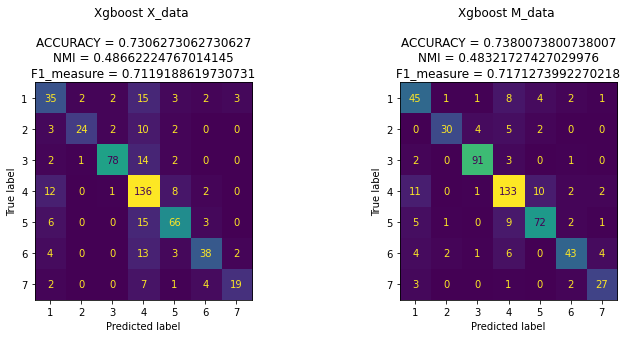

In [ ]:
#Confusion matrix Gradient Boosting
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Xgboost X_data \n\n"+"ACCURACY = "+str(xgb_ac)+"\nNMI = "+str(xgb_nmi)+"\nF1_measure = "+str(xgb_f1))
axes[1].set_title("Xgboost M_data \n\n"+"ACCURACY = "+str(xgb_acM)+"\nNMI = "+str(xgb_nmiM)+"\nF1_measure = "+str(xgb_f1M))
plot_confusion_matrix(clf_xgb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_xgbM,x_testM,y_testM,ax=axes[1],colorbar=False)

##AdaBoost

In [ ]:
#X(fea)
clf_adb = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_adb.fit(x_train,y_train)
y_pred = clf_adb.predict(x_test)
adb_ac=accuracy_score(y_test,y_pred)
adb_f1=f1_score(y_test,y_pred,average="macro")
adb_nmi=NMI(y_test,y_pred)
cora_metricsX=cora_metricsX.append({"method":"AdaBoost","ACCURACY":adb_ac,"NMI":adb_nmi,"F-measure":adb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_adbM = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_adbM.fit(x_trainM,y_trainM)
y_predM = clf_adbM.predict(x_testM)
adb_acM=accuracy_score(y_testM,y_predM)
adb_f1M=f1_score(y_testM,y_predM,average="macro")
adb_nmiM=NMI(y_testM,y_predM)
cora_metricsM=cora_metricsM.append({"method":"AdaBoost","ACCURACY":adb_acM,"NMI":adb_nmiM,"F-measure":adb_f1M},ignore_index=True)

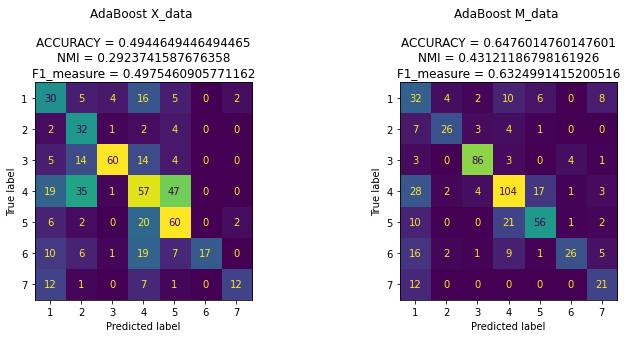

In [ ]:
#Confusion matrix Random Forest
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("AdaBoost X_data \n\n"+"ACCURACY = "+str(adb_ac)+"\nNMI = "+str(adb_nmi)+"\nF1_measure = "+str(adb_f1))
axes[1].set_title("AdaBoost M_data \n\n"+"ACCURACY = "+str(adb_acM)+"\nNMI = "+str(adb_nmiM)+"\nF1_measure = "+str(adb_f1M))
plot_confusion_matrix(clf_adb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_adbM,x_testM,y_testM,ax=axes[1],colorbar=False)

#**CORA resultats et commentaires**

Text(0.5, 1.0, '\n\nComparaison entre les modèles M-DATA ')

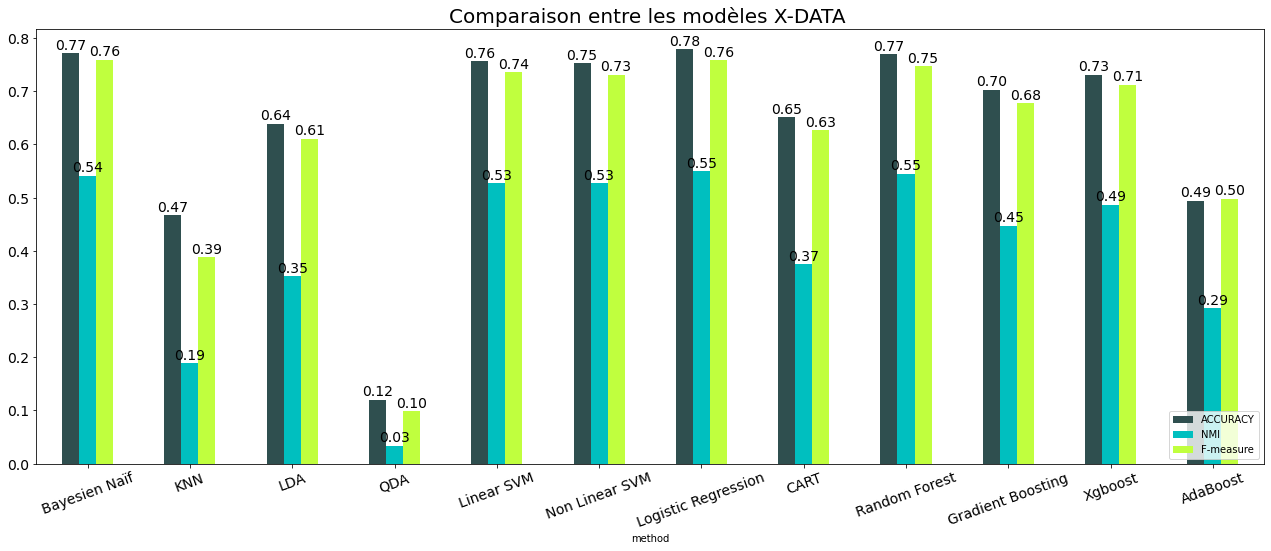

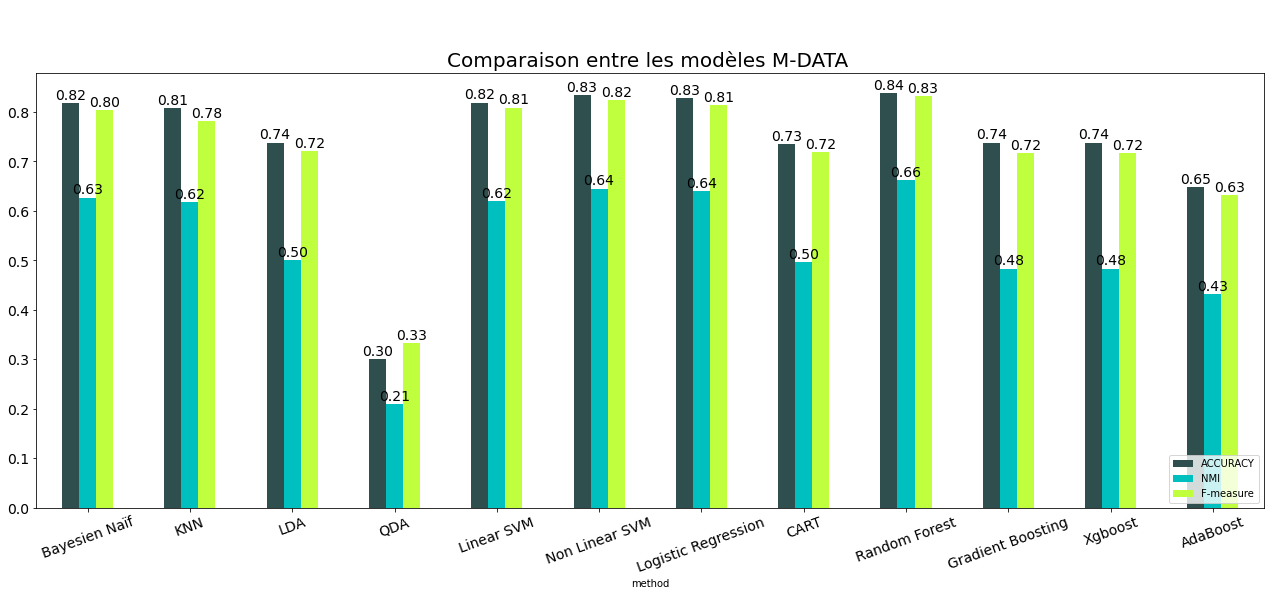

In [ ]:
#X_DATA Metrics
result=cora_metricsX.set_index("method")
r=result.plot(kind='bar',figsize=(22,8),color = ['darkslategrey', 'c',"#C0FF3E"],rot=20,fontsize=14)
for p in r.patches:
    r.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,8), 
                   textcoords = 'offset points',
                   fontsize=14)
plt.legend(loc=4)
plt.title('Comparaison entre les modèles X-DATA ',fontsize=20)

#M_DATA Metrics 
result=cora_metricsM.set_index("method")
r=result.plot(kind='bar',figsize=(22,8),color = ['darkslategrey', 'c',"#C0FF3E"],rot=20,fontsize=14)
for p in r.patches:
    r.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,8), 
                   textcoords = 'offset points',
                   fontsize=14)
plt.legend(loc=4)
plt.title('\n\nComparaison entre les modèles M-DATA ',fontsize=20)


D'apres le Barplot :  
*  Les classifieurs sur la matrices M donnent des resultats mieux  la matrice X 
*  Non linear SVM et Random forest sont les deux meilleurs models 
*  QDA donne les resultats les plus mediocres parmi les differents classifieurs 

#Citeseer

##Read and prepare Data 

In [ ]:
citeseer=scipy.io.loadmat('citeseer.mat')

In [ ]:
#l’information contenue dans la matrice X
citeseerX=citeseer["fea"]
citeseerY=np.concatenate(citeseer["gnd"])
citeseerW=citeseer["W"]
x_train,x_test,y_train,y_test=train_test_split(citeseerX,citeseerY,test_size=0.2,random_state=20)

In [ ]:
#M=D^(-1)*W*X
D=np.zeros((citeseerW.shape[0],citeseerW.shape[0]))
for i in range(citeseerW.shape[0]):
  D[i][i]=1/citeseerW[i].sum()
citeseerM=np.matmul(np.matmul(D,citeseerW),citeseerX)
x_trainM,x_testM,y_trainM,y_testM=train_test_split(citeseerM,citeseerY,test_size=0.2,random_state=20)

In [ ]:
#Metrics for both X-data and M-data
citeseer_metricsX=pd.DataFrame(columns=["method","ACCURACY","NMI","F-measure"])
citeseer_metricsM=pd.DataFrame(columns=["method","ACCURACY","NMI","F-measure"])

## Bayesien Naïf

In [ ]:
#X(fea)
clf_nb = BernoulliNB()
clf_nb.fit(x_train,y_train)
y_pred = clf_nb.predict(x_test)
nb_ac=accuracy_score(y_test,y_pred)
nb_f1=f1_score(y_test,y_pred,average="macro")
nb_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"Bayesien Naïf","ACCURACY":nb_ac,"NMI":nb_nmi,"F-measure":nb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_nbM = BernoulliNB()
clf_nbM.fit(x_trainM,y_trainM)
y_predM = clf_nbM.predict(x_testM)
nb_acM=accuracy_score(y_testM,y_predM)
nb_f1M=f1_score(y_testM,y_predM,average="macro")
nb_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"Bayesien Naïf","ACCURACY":nb_acM,"NMI":nb_nmiM,"F-measure":nb_f1M},ignore_index=True)

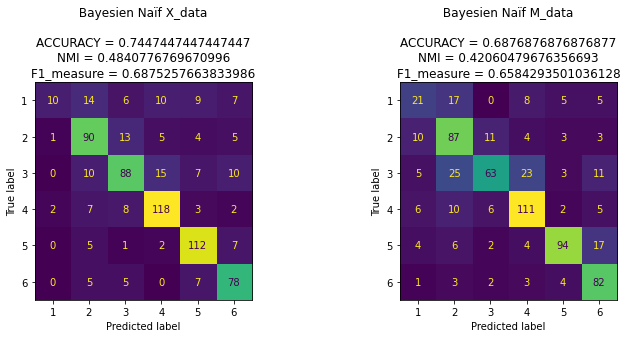

In [ ]:
#Confusion matrix  Bayesien Naïf
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title(" Bayesien Naïf X_data \n\n"+"ACCURACY = "+str(nb_ac)+"\nNMI = "+str(nb_nmi)+"\nF1_measure = "+str(nb_f1))
axes[1].set_title(" Bayesien Naïf M_data \n\n"+"ACCURACY = "+str(nb_acM)+"\nNMI = "+str(nb_nmiM)+"\nF1_measure = "+str(nb_f1M))
plot_confusion_matrix(clf_nb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_nbM,x_testM,y_testM,ax=axes[1],colorbar=False)

## KNN

In [ ]:
#X(fea)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(x_train,y_train)
y_pred = clf_knn.predict(x_test)
knn_ac=accuracy_score(y_test,y_pred)
knn_f1=f1_score(y_test,y_pred,average="macro")
knn_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"KNN","ACCURACY":knn_ac,"NMI":knn_nmi,"F-measure":knn_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_knnM = KNeighborsClassifier(n_neighbors=5)
clf_knnM.fit(x_trainM,y_trainM)
y_predM = clf_knnM.predict(x_testM)
knn_acM=accuracy_score(y_testM,y_predM)
knn_f1M=f1_score(y_testM,y_predM,average="macro")
knn_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"KNN","ACCURACY":knn_acM,"NMI":knn_nmiM,"F-measure":knn_f1M},ignore_index=True)

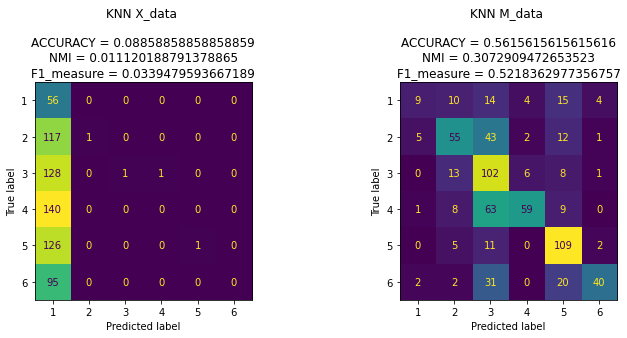

In [ ]:
#Confusion matrix knn
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("KNN X_data \n\n"+"ACCURACY = "+str(knn_ac)+"\nNMI = "+str(knn_nmi)+"\nF1_measure = "+str(knn_f1))
axes[1].set_title("KNN M_data \n\n"+"ACCURACY = "+str(knn_acM)+"\nNMI = "+str(knn_nmiM)+"\nF1_measure = "+str(knn_f1M))
plot_confusion_matrix(clf_knn,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_knnM,x_testM,y_testM,ax=axes[1],colorbar=False)

## LDA

In [ ]:
#X(fea)
clf_lda = LDA()
clf_lda.fit(x_train,y_train)
y_pred = clf_lda.predict(x_test)
lda_ac=accuracy_score(y_test,y_pred)
lda_f1=f1_score(y_test,y_pred,average="macro")
lda_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"LDA","ACCURACY":lda_ac,"NMI":lda_nmi,"F-measure":lda_f1},ignore_index=True)

Accuracy = 0.3768768768768769 	NMI = 0.11670202794784632 	F1_measure = 0.3695257914513373


In [ ]:
#M=D^(-1)*W*X
clf_ldaM = LDA()
clf_ldaM.fit(x_trainM,y_trainM)
y_predM = clf_ldaM.predict(x_testM)
lda_acM=accuracy_score(y_testM,y_predM)
lda_f1M=f1_score(y_testM,y_predM,average="macro")
lda_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"LDA","ACCURACY":lda_acM,"NMI":lda_nmiM,"F-measure":lda_f1M},ignore_index=True)

Accuracy = 0.46396396396396394 	NMI = 0.1619733317920361 	F1_measure = 0.45479356127576365


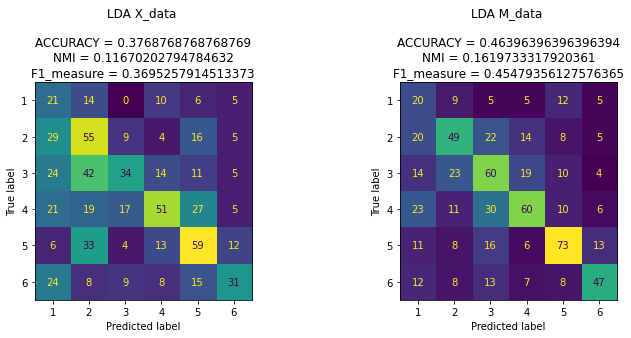

In [ ]:
#Confusion matrix lda
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("LDA X_data \n\n"+"ACCURACY = "+str(lda_ac)+"\nNMI = "+str(lda_nmi)+"\nF1_measure = "+str(lda_f1))
axes[1].set_title("LDA M_data \n\n"+"ACCURACY = "+str(lda_acM)+"\nNMI = "+str(lda_nmiM)+"\nF1_measure = "+str(lda_f1M))
plot_confusion_matrix(clf_lda,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_ldaM,x_testM,y_testM,ax=axes[1],colorbar=False)

## QDA

In [ ]:
#X(fea)
clf_qda = QDA()
clf_qda.fit(x_train,y_train)
y_pred = clf_qda.predict(x_test)
qda_ac=accuracy_score(y_test,y_pred)
qda_f1=f1_score(y_test,y_pred,average="macro")
qda_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"QDA","ACCURACY":qda_ac,"NMI":qda_nmi,"F-measure":qda_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_qdaM = QDA()
clf_qdaM.fit(x_trainM,y_trainM)
y_predM = clf_qdaM.predict(x_testM)
qda_acM=accuracy_score(y_testM,y_predM)
qda_f1M=f1_score(y_testM,y_predM,average="macro")
qda_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"QDA","ACCURACY":qda_acM,"NMI":qda_nmiM,"F-measure":qda_f1M},ignore_index=True)

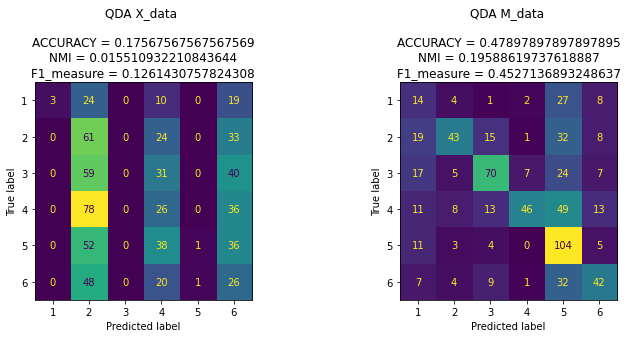

In [ ]:
#Confusion matrix qda
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("QDA X_data \n\n"+"ACCURACY = "+str(qda_ac)+"\nNMI = "+str(qda_nmi)+"\nF1_measure = "+str(qda_f1))
axes[1].set_title("QDA M_data \n\n"+"ACCURACY = "+str(qda_acM)+"\nNMI = "+str(qda_nmiM)+"\nF1_measure = "+str(qda_f1M))
plot_confusion_matrix(clf_qda,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_qdaM,x_testM,y_testM,ax=axes[1],colorbar=False)

## Linear SVM

In [ ]:
#X(fea)
clf_l_svm = svm.LinearSVC()
clf_l_svm.fit(x_train,y_train)
y_pred = clf_l_svm.predict(x_test)
l_svm_ac=accuracy_score(y_test,y_pred)
l_svm_f1=f1_score(y_test,y_pred,average="macro")
l_svm_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"Linear SVM","ACCURACY":l_svm_ac,"NMI":l_svm_nmi,"F-measure":l_svm_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_l_svmM = svm.LinearSVC()
clf_l_svmM.fit(x_trainM,y_trainM)
y_predM = clf_l_svmM.predict(x_testM)
l_svm_acM=accuracy_score(y_testM,y_predM)
l_svm_f1M=f1_score(y_testM,y_predM,average="macro")
l_svm_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"Linear SVM","ACCURACY":l_svm_acM,"NMI":l_svm_nmiM,"F-measure":l_svm_f1M},ignore_index=True)

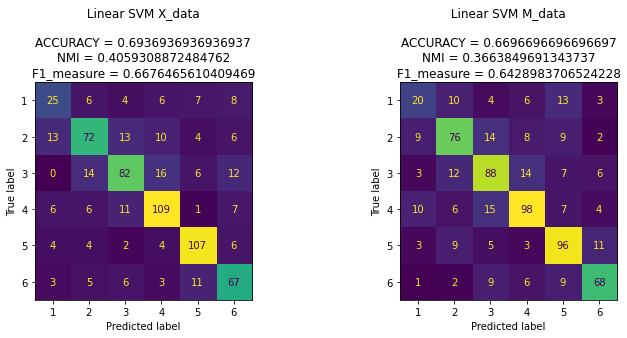

In [ ]:
#Confusion matrix  Linear SVM
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title(" Linear SVM X_data \n\n"+"ACCURACY = "+str(l_svm_ac)+"\nNMI = "+str(l_svm_nmi)+"\nF1_measure = "+str(l_svm_f1))
axes[1].set_title(" Linear SVM M_data \n\n"+"ACCURACY = "+str(l_svm_acM)+"\nNMI = "+str(l_svm_nmiM)+"\nF1_measure = "+str(l_svm_f1M))
plot_confusion_matrix(clf_l_svm,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_l_svmM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Non Linear SVM

In [ ]:
#X(fea)
clf_nl_svm = svm.SVC(C=100,gamma=0.001,kernel='rbf')
clf_nl_svm.fit(x_train,y_train)
y_pred = clf_nl_svm.predict(x_test)
nl_svm_ac=accuracy_score(y_test,y_pred)
nl_svm_f1=f1_score(y_test,y_pred,average="macro")
nl_svm_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"Non Linear SVM","ACCURACY":nl_svm_ac,"NMI":nl_svm_nmi,"F-measure":nl_svm_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_nl_svmM = svm.SVC(C=100,gamma=0.001,kernel='rbf')
clf_nl_svmM.fit(x_trainM,y_trainM)
y_predM = clf_nl_svmM.predict(x_testM)
nl_svm_acM=accuracy_score(y_testM,y_predM)
nl_svm_f1M=f1_score(y_testM,y_predM,average="macro")
nl_svm_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"Non Linear SVM","ACCURACY":nl_svm_acM,"NMI":nl_svm_nmiM,"F-measure":nl_svm_f1M},ignore_index=True)

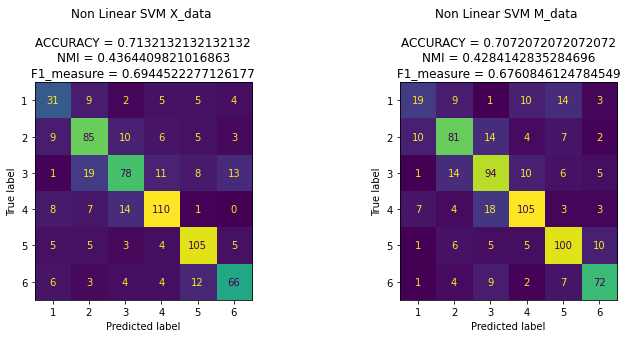

In [ ]:
#Confusion matrix Non Linear SVM
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Non Linear SVM X_data \n\n"+"ACCURACY = "+str(nl_svm_ac)+"\nNMI = "+str(nl_svm_nmi)+"\nF1_measure = "+str(nl_svm_f1))
axes[1].set_title("Non Linear SVM M_data \n\n"+"ACCURACY = "+str(nl_svm_acM)+"\nNMI = "+str(nl_svm_nmiM)+"\nF1_measure = "+str(nl_svm_f1M))
plot_confusion_matrix(clf_nl_svm,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_nl_svmM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Logistic Regression

In [ ]:
#X(fea)
clf_lr = LogisticRegression()
clf_lr.fit(x_train,y_train)
y_pred = clf_lr.predict(x_test)
lr_ac=accuracy_score(y_test,y_pred)
lr_f1=f1_score(y_test,y_pred,average="macro")
lr_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"Logistic Regression","ACCURACY":lr_ac,"NMI":lr_nmi,"F-measure":lr_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_lrM = LogisticRegression()
clf_lrM.fit(x_trainM,y_trainM)
y_predM = clf_lrM.predict(x_testM)
lr_acM=accuracy_score(y_testM,y_predM)
lr_f1M=f1_score(y_testM,y_predM,average="macro")
lr_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"Logistic Regression","ACCURACY":lr_acM,"NMI":lr_nmiM,"F-measure":lr_f1M},ignore_index=True)

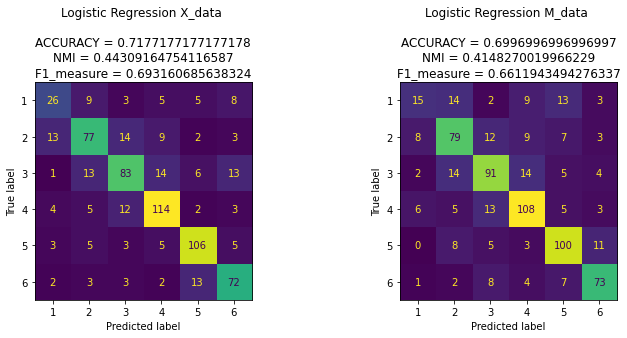

In [ ]:
#Confusion matrix Logistic Regression
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Logistic Regression X_data \n\n"+"ACCURACY = "+str(lr_ac)+"\nNMI = "+str(lr_nmi)+"\nF1_measure = "+str(lr_f1))
axes[1].set_title("Logistic Regression M_data \n\n"+"ACCURACY = "+str(lr_acM)+"\nNMI = "+str(lr_nmiM)+"\nF1_measure = "+str(lr_f1M))
plot_confusion_matrix(clf_lr,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_lrM,x_testM,y_testM,ax=axes[1],colorbar=False)

##CART

In [ ]:
#X(fea)
clf_cart = DecisionTreeClassifier()
clf_cart.fit(x_train,y_train)
y_pred = clf_cart.predict(x_test)
cart_ac=accuracy_score(y_test,y_pred)
cart_f1=f1_score(y_test,y_pred,average="macro")
cart_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"CART","ACCURACY":cart_ac,"NMI":cart_nmi,"F-measure":cart_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_cartM = DecisionTreeClassifier()
clf_cartM.fit(x_trainM,y_trainM)
y_predM = clf_cartM.predict(x_testM)
cart_acM=accuracy_score(y_testM,y_predM)
cart_f1M=f1_score(y_testM,y_predM,average="macro")
cart_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"CART","ACCURACY":cart_acM,"NMI":cart_nmiM,"F-measure":cart_f1M},ignore_index=True)

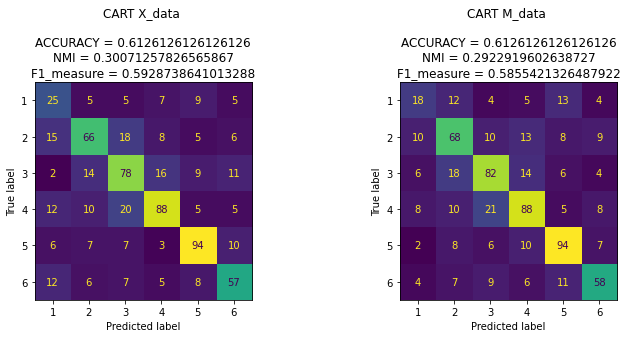

In [ ]:
#Confusion matrix Logistic Regression
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("CART X_data \n\n"+"ACCURACY = "+str(cart_ac)+"\nNMI = "+str(cart_nmi)+"\nF1_measure = "+str(cart_f1))
axes[1].set_title("CART M_data \n\n"+"ACCURACY = "+str(cart_acM)+"\nNMI = "+str(cart_nmiM)+"\nF1_measure = "+str(cart_f1M))
plot_confusion_matrix(clf_cart,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_cartM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Random Forest

In [ ]:
#X(fea)
clf_rf = RandomForestClassifier(max_depth=100, random_state=0)
clf_rf.fit(x_train,y_train)
y_pred = clf_rf.predict(x_test)
rf_ac=accuracy_score(y_test,y_pred)
rf_f1=f1_score(y_test,y_pred,average="macro")
rf_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"Random Forest","ACCURACY":rf_ac,"NMI":rf_nmi,"F-measure":rf_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_rfM = RandomForestClassifier(max_depth=100, random_state=0)
clf_rfM.fit(x_trainM,y_trainM)
y_predM = clf_rfM.predict(x_testM)
rf_acM=accuracy_score(y_testM,y_predM)
rf_f1M=f1_score(y_testM,y_predM,average="macro")
rf_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"Random Forest","ACCURACY":rf_acM,"NMI":rf_nmiM,"F-measure":rf_f1M},ignore_index=True)

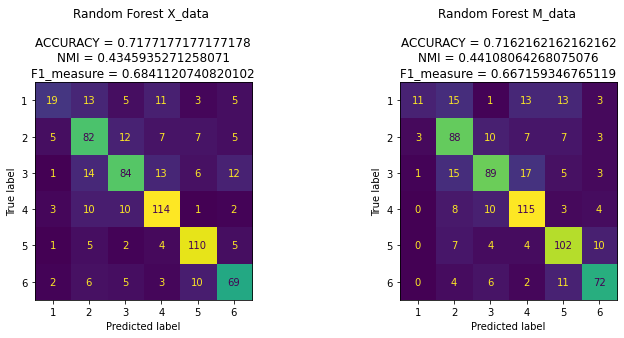

In [ ]:
#Confusion matrix Random Forest
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Random Forest X_data \n\n"+"ACCURACY = "+str(rf_ac)+"\nNMI = "+str(rf_nmi)+"\nF1_measure = "+str(rf_f1))
axes[1].set_title("Random Forest M_data \n\n"+"ACCURACY = "+str(rf_acM)+"\nNMI = "+str(rf_nmiM)+"\nF1_measure = "+str(rf_f1M))
plot_confusion_matrix(clf_rf,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_rfM,x_testM,y_testM,ax=axes[1],colorbar=False)

## Gradient Boosting

In [ ]:
#X(fea)
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf_gb.fit(x_train,y_train)
y_pred = clf_gb.predict(x_test)
gb_ac=accuracy_score(y_test,y_pred)
gb_f1=f1_score(y_test,y_pred,average="macro")
gb_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"Gradient Boosting","ACCURACY":gb_ac,"NMI":gb_nmi,"F-measure":gb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_gbM = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf_gb.fit(x_train,y_train)
clf_gbM.fit(x_trainM,y_trainM)
y_predM = clf_gbM.predict(x_testM)
gb_acM=accuracy_score(y_testM,y_predM)
gb_f1M=f1_score(y_testM,y_predM,average="macro")
gb_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"Gradient Boosting","ACCURACY":gb_acM,"NMI":gb_nmiM,"F-measure":gb_f1M},ignore_index=True)

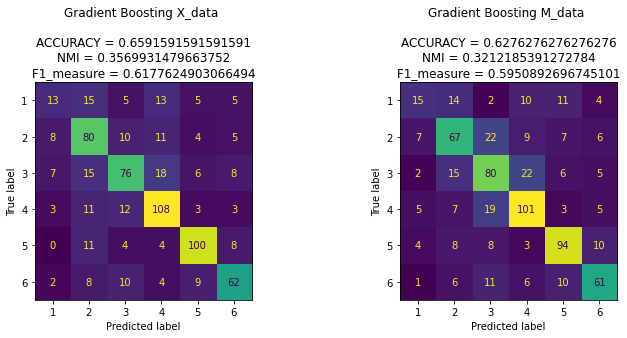

In [ ]:
#Confusion matrix Gradient Boosting
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Gradient Boosting X_data \n\n"+"ACCURACY = "+str(gb_ac)+"\nNMI = "+str(gb_nmi)+"\nF1_measure = "+str(gb_f1))
axes[1].set_title("Gradient Boosting M_data \n\n"+"ACCURACY = "+str(gb_acM)+"\nNMI = "+str(gb_nmiM)+"\nF1_measure = "+str(gb_f1M))
plot_confusion_matrix(clf_gb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_gbM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Xgboost

In [ ]:
#X(fea)
clf_xgb = xgboost.XGBClassifier(n_jobs=1)
clf_xgb.fit(x_train,y_train)
y_pred = clf_xgb.predict(x_test)
xgb_ac=accuracy_score(y_test,y_pred)
xgb_f1=f1_score(y_test,y_pred,average="macro")
xgb_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"Xgboost","ACCURACY":xgb_ac,"NMI":xgb_nmi,"F-measure":xgb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_xgbM = xgboost.XGBClassifier(n_jobs=1)
clf_xgbM.fit(x_trainM,y_trainM)
y_predM = clf_gbM.predict(x_testM)
xgb_acM=accuracy_score(y_testM,y_predM)
xgb_f1M=f1_score(y_testM,y_predM,average="macro")
xgb_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"Xgboost","ACCURACY":xgb_acM,"NMI":xgb_nmiM,"F-measure":xgb_f1M},ignore_index=True)

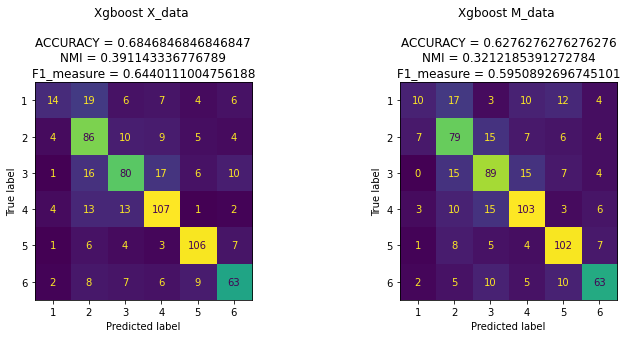

In [ ]:
#Confusion matrix Gradient Boosting
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Xgboost X_data \n\n"+"ACCURACY = "+str(xgb_ac)+"\nNMI = "+str(xgb_nmi)+"\nF1_measure = "+str(xgb_f1))
axes[1].set_title("Xgboost M_data \n\n"+"ACCURACY = "+str(xgb_acM)+"\nNMI = "+str(xgb_nmiM)+"\nF1_measure = "+str(xgb_f1M))
plot_confusion_matrix(clf_xgb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_xgbM,x_testM,y_testM,ax=axes[1],colorbar=False)

##AdaBoost

In [ ]:
#X(fea)
clf_adb = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_adb.fit(x_train,y_train)
y_pred = clf_adb.predict(x_test)
adb_ac=accuracy_score(y_test,y_pred)
adb_f1=f1_score(y_test,y_pred,average="macro")
adb_nmi=NMI(y_test,y_pred)
citeseer_metricsX=citeseer_metricsX.append({"method":"AdaBoost","ACCURACY":adb_ac,"NMI":adb_nmi,"F-measure":adb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_adbM = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_adbM.fit(x_trainM,y_trainM)
y_predM = clf_adbM.predict(x_testM)
adb_acM=accuracy_score(y_testM,y_predM)
adb_f1M=f1_score(y_testM,y_predM,average="macro")
adb_nmiM=NMI(y_testM,y_predM)
citeseer_metricsM=citeseer_metricsM.append({"method":"AdaBoost","ACCURACY":adb_acM,"NMI":adb_nmiM,"F-measure":adb_f1M},ignore_index=True)

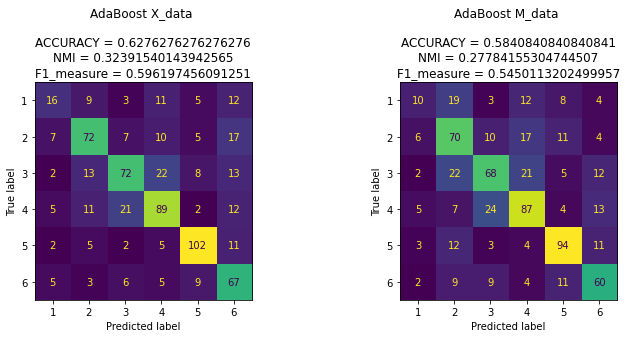

In [ ]:
#Confusion matrix Random Forest
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("AdaBoost X_data \n\n"+"ACCURACY = "+str(adb_ac)+"\nNMI = "+str(adb_nmi)+"\nF1_measure = "+str(adb_f1))
axes[1].set_title("AdaBoost M_data \n\n"+"ACCURACY = "+str(adb_acM)+"\nNMI = "+str(adb_nmiM)+"\nF1_measure = "+str(adb_f1M))
plot_confusion_matrix(clf_adb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_adbM,x_testM,y_testM,ax=axes[1],colorbar=False)

#Citeseer Resultats et commentaires 

Text(0.5, 1.0, '\n\nComparaison entre les modèles M-DATA ')

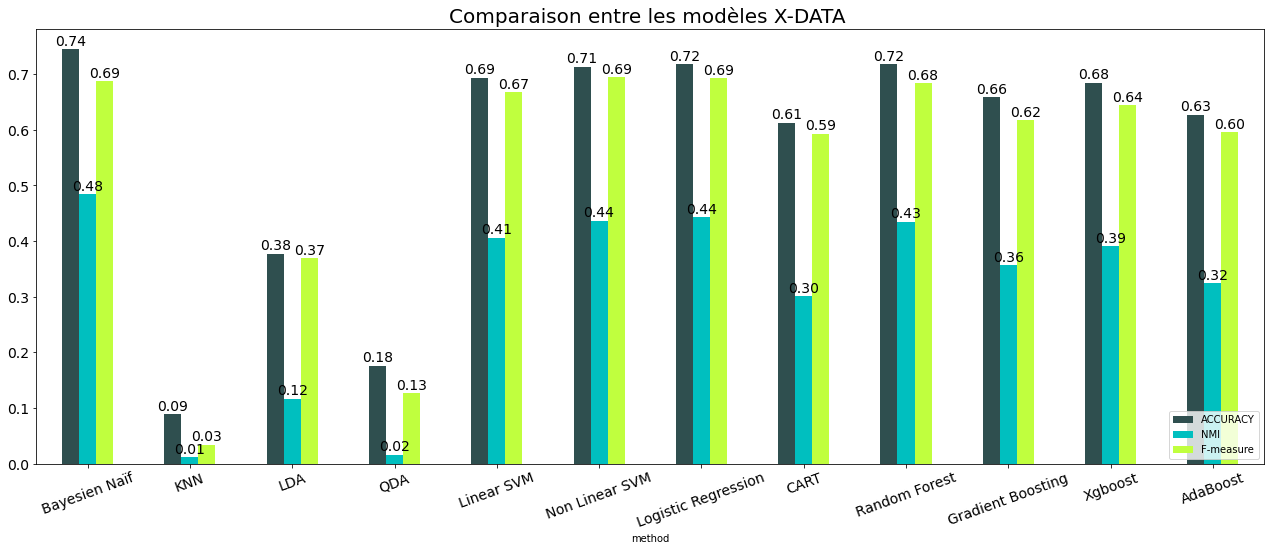

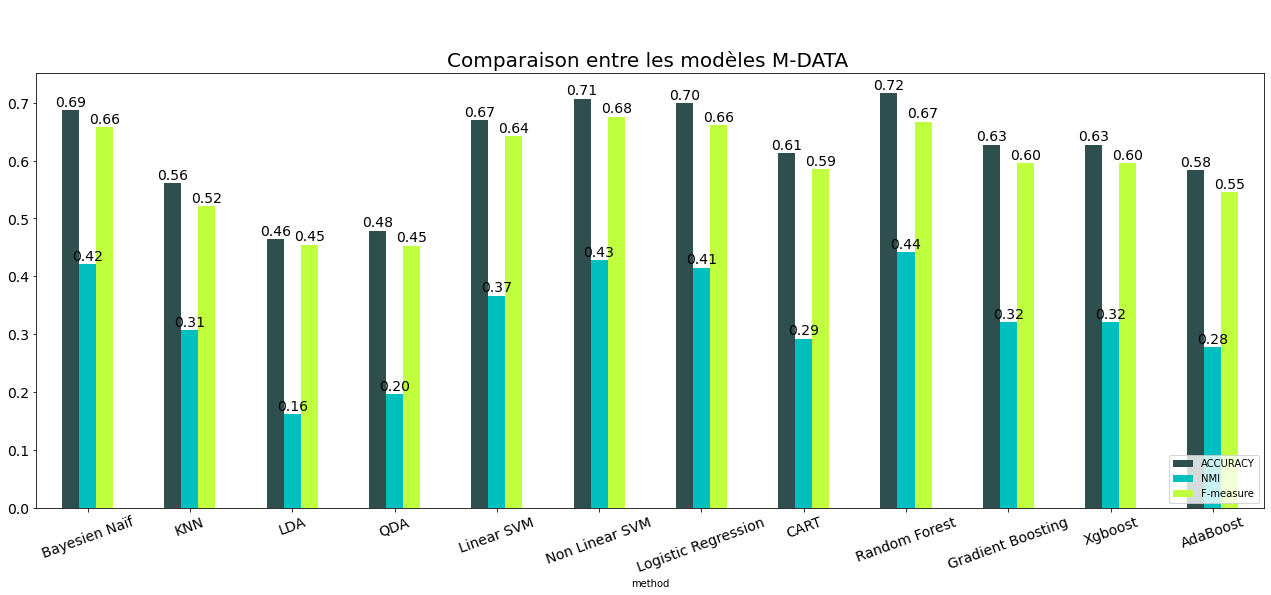

In [ ]:
#X_DATA Metrics
result=citeseer_metricsX.set_index("method")
r=result.plot(kind='bar',figsize=(22,8),color = ['darkslategrey', 'c',"#C0FF3E"],rot=20,fontsize=14)
for p in r.patches:
    r.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,8), 
                   textcoords = 'offset points',
                   fontsize=14)
plt.legend(loc=4)
plt.title('Comparaison entre les modèles X-DATA ',fontsize=20)

#M_DATA Metrics 
result=citeseer_metricsM.set_index("method")
r=result.plot(kind='bar',figsize=(22,8),color = ['darkslategrey', 'c',"#C0FF3E"],rot=20,fontsize=14)
for p in r.patches:
    r.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,8), 
                   textcoords = 'offset points',
                   fontsize=14)
plt.legend(loc=4)
plt.title('\n\nComparaison entre les modèles M-DATA ',fontsize=20)


D'apres le Barplot :

*  Les classifieurs sur la matrices X donnent des resultats mieux la matrice M
*  Random forest et Non linear SVM sont les deux meilleurs models
*  KNN et QDA donnent les resultats les plus mediocres parmi les differents classifieurs

#Pubmed

##Read and prepare Data 

In [ ]:
pubmed=scipy.io.loadmat('pubmed.mat')

In [ ]:
#l’information contenue dans la matrice X
pubmedX=pubmed["fea"]
pubmedY=np.concatenate(pubmed["gnd"])
pubmedW=pubmed["W"].toarray()
x_train,x_test,y_train,y_test=train_test_split(pubmedX,pubmedY,test_size=0.2,random_state=20)

In [ ]:
#M=D^(-1)*W*X
D=np.zeros((pubmedW.shape[0],pubmedW.shape[0]))
for i in range(pubmedW.shape[0]):
  D[i][i]=1/pubmedW[i].sum()
pubmedM=np.matmul(np.matmul(D,pubmedW),pubmedX)
x_trainM,x_testM,y_trainM,y_testM=train_test_split(pubmedM,pubmedY,test_size=0.2,random_state=20)

In [ ]:
#Metrics for both X-data and M-data
pubmed_metricsX=pd.DataFrame(columns=["method","ACCURACY","NMI","F-measure"])
pubmed_metricsM=pd.DataFrame(columns=["method","ACCURACY","NMI","F-measure"])

## Bayesien Naïf

In [ ]:
#X(fea)
clf_nb = BernoulliNB()
clf_nb.fit(x_train,y_train)
y_pred = clf_nb.predict(x_test)
nb_ac=accuracy_score(y_test,y_pred)
nb_f1=f1_score(y_test,y_pred,average="macro")
nb_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"Bayesien Naïf","ACCURACY":nb_ac,"NMI":nb_nmi,"F-measure":nb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_nbM = BernoulliNB()
clf_nbM.fit(x_trainM,y_trainM)
y_predM = clf_nbM.predict(x_testM)
nb_acM=accuracy_score(y_testM,y_predM)
nb_f1M=f1_score(y_testM,y_predM,average="macro")
nb_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"Bayesien Naïf","ACCURACY":nb_acM,"NMI":nb_nmiM,"F-measure":nb_f1M},ignore_index=True)

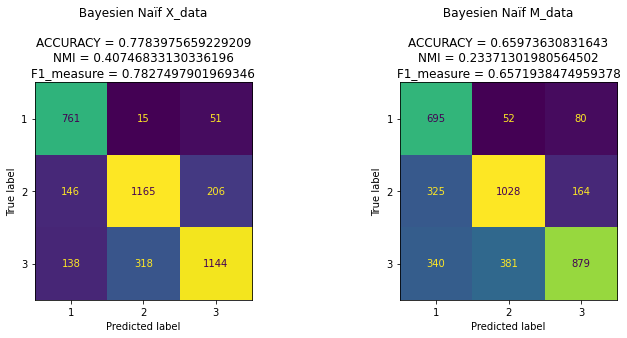

In [ ]:
#Confusion matrix  Bayesien Naïf
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title(" Bayesien Naïf X_data \n\n"+"ACCURACY = "+str(nb_ac)+"\nNMI = "+str(nb_nmi)+"\nF1_measure = "+str(nb_f1))
axes[1].set_title(" Bayesien Naïf M_data \n\n"+"ACCURACY = "+str(nb_acM)+"\nNMI = "+str(nb_nmiM)+"\nF1_measure = "+str(nb_f1M))
plot_confusion_matrix(clf_nb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_nbM,x_testM,y_testM,ax=axes[1],colorbar=False)

## KNN

In [ ]:
#X(fea)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(x_train,y_train)
y_pred = clf_knn.predict(x_test)
knn_ac=accuracy_score(y_test,y_pred)
knn_f1=f1_score(y_test,y_pred,average="macro")
knn_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"KNN","ACCURACY":knn_ac,"NMI":knn_nmi,"F-measure":knn_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_knnM = KNeighborsClassifier(n_neighbors=5)
clf_knnM.fit(x_trainM,y_trainM)
y_predM = clf_knnM.predict(x_testM)
knn_acM=accuracy_score(y_testM,y_predM)
knn_f1M=f1_score(y_testM,y_predM,average="macro")
knn_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"KNN","ACCURACY":knn_acM,"NMI":knn_nmiM,"F-measure":knn_f1M},ignore_index=True)

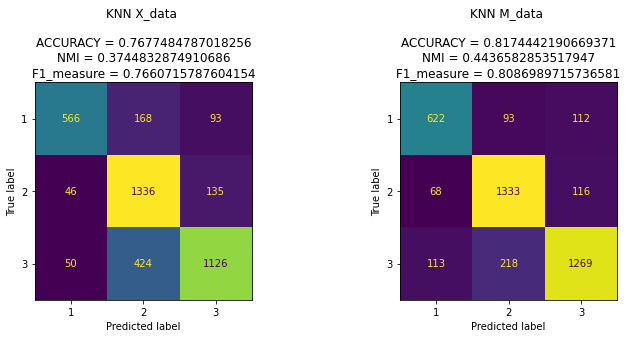

In [ ]:
#Confusion matrix knn
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("KNN X_data \n\n"+"ACCURACY = "+str(knn_ac)+"\nNMI = "+str(knn_nmi)+"\nF1_measure = "+str(knn_f1))
axes[1].set_title("KNN M_data \n\n"+"ACCURACY = "+str(knn_acM)+"\nNMI = "+str(knn_nmiM)+"\nF1_measure = "+str(knn_f1M))
plot_confusion_matrix(clf_knn,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_knnM,x_testM,y_testM,ax=axes[1],colorbar=False)

## LDA

In [ ]:
#X(fea)
clf_lda = LDA()
clf_lda.fit(x_train,y_train)
y_pred = clf_lda.predict(x_test)
lda_ac=accuracy_score(y_test,y_pred)
lda_f1=f1_score(y_test,y_pred,average="macro")
lda_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"LDA","ACCURACY":lda_ac,"NMI":lda_nmi,"F-measure":lda_f1},ignore_index=True)

Accuracy = 0.8635902636916836 	NMI = 0.5466107112793931 	F1_measure = 0.8613846221336212


In [ ]:
#M=D^(-1)*W*X
clf_ldaM = LDA()
clf_ldaM.fit(x_trainM,y_trainM)
y_predM = clf_ldaM.predict(x_testM)
lda_acM=accuracy_score(y_testM,y_predM)
lda_f1M=f1_score(y_testM,y_predM,average="macro")
lda_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"LDA","ACCURACY":lda_acM,"NMI":lda_nmiM,"F-measure":lda_f1M},ignore_index=True)

Accuracy = 0.8171906693711968 	NMI = 0.44525046206725777 	F1_measure = 0.8095341790455084


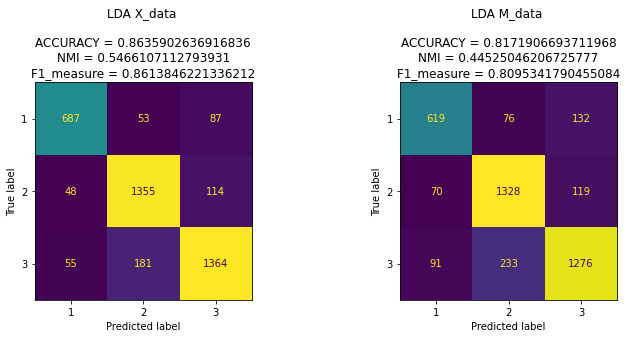

In [ ]:
#Confusion matrix lda
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("LDA X_data \n\n"+"ACCURACY = "+str(lda_ac)+"\nNMI = "+str(lda_nmi)+"\nF1_measure = "+str(lda_f1))
axes[1].set_title("LDA M_data \n\n"+"ACCURACY = "+str(lda_acM)+"\nNMI = "+str(lda_nmiM)+"\nF1_measure = "+str(lda_f1M))
plot_confusion_matrix(clf_lda,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_ldaM,x_testM,y_testM,ax=axes[1],colorbar=False)

## QDA

In [ ]:
#X(fea)
clf_qda = QDA()
clf_qda.fit(x_train,y_train)
y_pred = clf_qda.predict(x_test)
qda_ac=accuracy_score(y_test,y_pred)
qda_f1=f1_score(y_test,y_pred,average="macro")
qda_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"QDA","ACCURACY":qda_ac,"NMI":qda_nmi,"F-measure":qda_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_qdaM = QDA()
clf_qdaM.fit(x_trainM,y_trainM)
y_predM = clf_qdaM.predict(x_testM)
qda_acM=accuracy_score(y_testM,y_predM)
qda_f1M=f1_score(y_testM,y_predM,average="macro")
qda_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"QDA","ACCURACY":qda_acM,"NMI":qda_nmiM,"F-measure":qda_f1M},ignore_index=True)

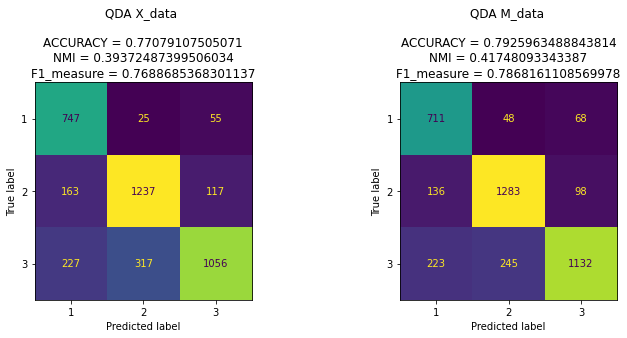

In [ ]:
#Confusion matrix qda
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("QDA X_data \n\n"+"ACCURACY = "+str(qda_ac)+"\nNMI = "+str(qda_nmi)+"\nF1_measure = "+str(qda_f1))
axes[1].set_title("QDA M_data \n\n"+"ACCURACY = "+str(qda_acM)+"\nNMI = "+str(qda_nmiM)+"\nF1_measure = "+str(qda_f1M))
plot_confusion_matrix(clf_qda,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_qdaM,x_testM,y_testM,ax=axes[1],colorbar=False)

## Linear SVM

In [ ]:
#X(fea)
clf_l_svm = svm.LinearSVC()
clf_l_svm.fit(x_train,y_train)
y_pred = clf_l_svm.predict(x_test)
l_svm_ac=accuracy_score(y_test,y_pred)
l_svm_f1=f1_score(y_test,y_pred,average="macro")
l_svm_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"Linear SVM","ACCURACY":l_svm_ac,"NMI":l_svm_nmi,"F-measure":l_svm_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_l_svmM = svm.LinearSVC()
clf_l_svmM.fit(x_trainM,y_trainM)
y_predM = clf_l_svmM.predict(x_testM)
l_svm_acM=accuracy_score(y_testM,y_predM)
l_svm_f1M=f1_score(y_testM,y_predM,average="macro")
l_svm_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"Linear SVM","ACCURACY":l_svm_acM,"NMI":l_svm_nmiM,"F-measure":l_svm_f1M},ignore_index=True)

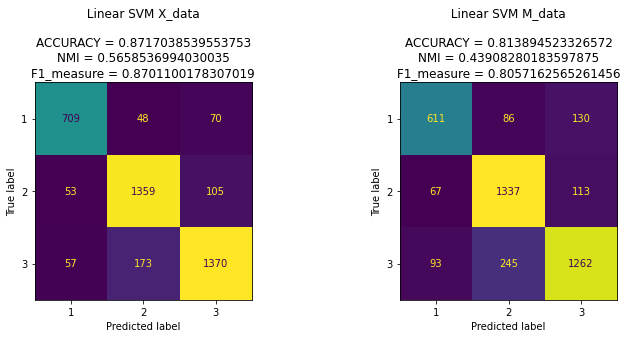

In [ ]:
#Confusion matrix  Linear SVM
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title(" Linear SVM X_data \n\n"+"ACCURACY = "+str(l_svm_ac)+"\nNMI = "+str(l_svm_nmi)+"\nF1_measure = "+str(l_svm_f1))
axes[1].set_title(" Linear SVM M_data \n\n"+"ACCURACY = "+str(l_svm_acM)+"\nNMI = "+str(l_svm_nmiM)+"\nF1_measure = "+str(l_svm_f1M))
plot_confusion_matrix(clf_l_svm,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_l_svmM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Non Linear SVM

In [ ]:
#X(fea)
clf_nl_svm = svm.SVC(C=100,gamma=0.001,kernel='rbf')
clf_nl_svm.fit(x_train,y_train)
y_pred = clf_nl_svm.predict(x_test)
nl_svm_ac=accuracy_score(y_test,y_pred)
nl_svm_f1=f1_score(y_test,y_pred,average="macro")
nl_svm_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"Non Linear SVM","ACCURACY":nl_svm_ac,"NMI":nl_svm_nmi,"F-measure":nl_svm_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_nl_svmM = svm.SVC(C=100,gamma=0.001,kernel='rbf')
clf_nl_svmM.fit(x_trainM,y_trainM)
y_predM = clf_nl_svmM.predict(x_testM)
nl_svm_acM=accuracy_score(y_testM,y_predM)
nl_svm_f1M=f1_score(y_testM,y_predM,average="macro")
nl_svm_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"Non Linear SVM","ACCURACY":nl_svm_acM,"NMI":nl_svm_nmiM,"F-measure":nl_svm_f1M},ignore_index=True)

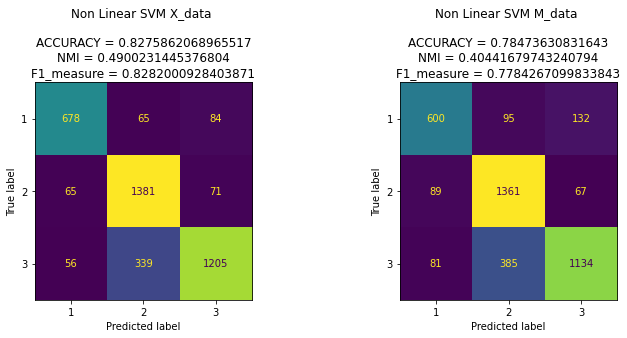

In [ ]:
#Confusion matrix Non Linear SVM
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Non Linear SVM X_data \n\n"+"ACCURACY = "+str(nl_svm_ac)+"\nNMI = "+str(nl_svm_nmi)+"\nF1_measure = "+str(nl_svm_f1))
axes[1].set_title("Non Linear SVM M_data \n\n"+"ACCURACY = "+str(nl_svm_acM)+"\nNMI = "+str(nl_svm_nmiM)+"\nF1_measure = "+str(nl_svm_f1M))
plot_confusion_matrix(clf_nl_svm,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_nl_svmM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Logistic Regression

In [ ]:
#X(fea)
clf_lr = LogisticRegression()
clf_lr.fit(x_train,y_train)
y_pred = clf_lr.predict(x_test)
lr_ac=accuracy_score(y_test,y_pred)
lr_f1=f1_score(y_test,y_pred,average="macro")
lr_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"Logistic Regression","ACCURACY":lr_ac,"NMI":lr_nmi,"F-measure":lr_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_lrM = LogisticRegression()
clf_lrM.fit(x_trainM,y_trainM)
y_predM = clf_lrM.predict(x_testM)
lr_acM=accuracy_score(y_testM,y_predM)
lr_f1M=f1_score(y_testM,y_predM,average="macro")
lr_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"Logistic Regression","ACCURACY":lr_acM,"NMI":lr_nmiM,"F-measure":lr_f1M},ignore_index=True)

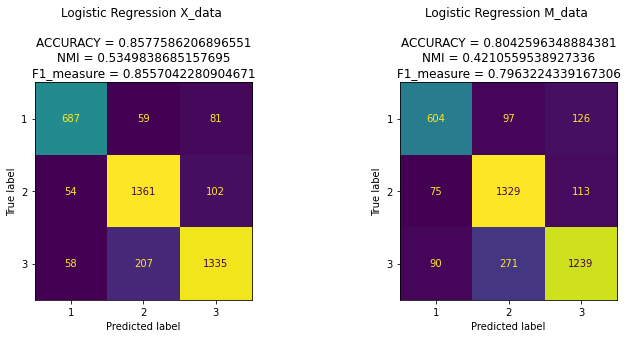

In [ ]:
#Confusion matrix Logistic Regression
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Logistic Regression X_data \n\n"+"ACCURACY = "+str(lr_ac)+"\nNMI = "+str(lr_nmi)+"\nF1_measure = "+str(lr_f1))
axes[1].set_title("Logistic Regression M_data \n\n"+"ACCURACY = "+str(lr_acM)+"\nNMI = "+str(lr_nmiM)+"\nF1_measure = "+str(lr_f1M))
plot_confusion_matrix(clf_lr,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_lrM,x_testM,y_testM,ax=axes[1],colorbar=False)

##CART

In [ ]:
#X(fea)
clf_cart = DecisionTreeClassifier()
clf_cart.fit(x_train,y_train)
y_pred = clf_cart.predict(x_test)
cart_ac=accuracy_score(y_test,y_pred)
cart_f1=f1_score(y_test,y_pred,average="macro")
cart_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"CART","ACCURACY":cart_ac,"NMI":cart_nmi,"F-measure":cart_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_cartM = DecisionTreeClassifier()
clf_cartM.fit(x_trainM,y_trainM)
y_predM = clf_cartM.predict(x_testM)
cart_acM=accuracy_score(y_testM,y_predM)
cart_f1M=f1_score(y_testM,y_predM,average="macro")
cart_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"CART","ACCURACY":cart_acM,"NMI":cart_nmiM,"F-measure":cart_f1M},ignore_index=True)

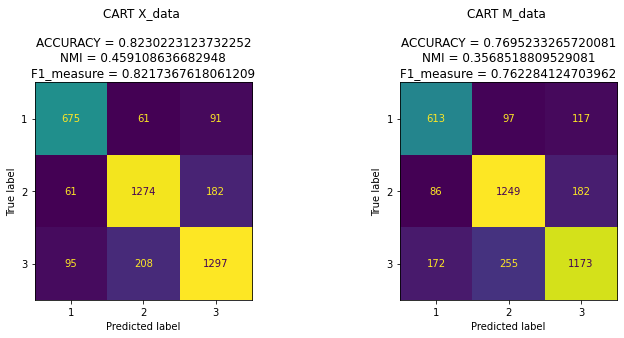

In [ ]:
#Confusion matrix Logistic Regression
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("CART X_data \n\n"+"ACCURACY = "+str(cart_ac)+"\nNMI = "+str(cart_nmi)+"\nF1_measure = "+str(cart_f1))
axes[1].set_title("CART M_data \n\n"+"ACCURACY = "+str(cart_acM)+"\nNMI = "+str(cart_nmiM)+"\nF1_measure = "+str(cart_f1M))
plot_confusion_matrix(clf_cart,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_cartM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Random Forest

In [ ]:
#X(fea)
clf_rf = RandomForestClassifier(max_depth=100, random_state=0)
clf_rf.fit(x_train,y_train)
y_pred = clf_rf.predict(x_test)
rf_ac=accuracy_score(y_test,y_pred)
rf_f1=f1_score(y_test,y_pred,average="macro")
rf_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"Random Forest","ACCURACY":rf_ac,"NMI":rf_nmi,"F-measure":rf_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_rfM = RandomForestClassifier(max_depth=100, random_state=0)
clf_rfM.fit(x_trainM,y_trainM)
y_predM = clf_rfM.predict(x_testM)
rf_acM=accuracy_score(y_testM,y_predM)
rf_f1M=f1_score(y_testM,y_predM,average="macro")
rf_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"Random Forest","ACCURACY":rf_acM,"NMI":rf_nmiM,"F-measure":rf_f1M},ignore_index=True)

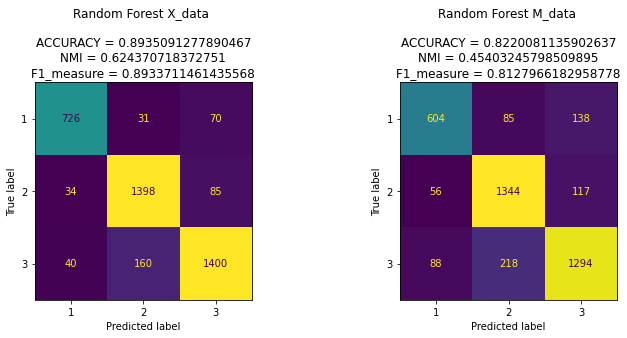

In [ ]:
#Confusion matrix Random Forest
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Random Forest X_data \n\n"+"ACCURACY = "+str(rf_ac)+"\nNMI = "+str(rf_nmi)+"\nF1_measure = "+str(rf_f1))
axes[1].set_title("Random Forest M_data \n\n"+"ACCURACY = "+str(rf_acM)+"\nNMI = "+str(rf_nmiM)+"\nF1_measure = "+str(rf_f1M))
plot_confusion_matrix(clf_rf,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_rfM,x_testM,y_testM,ax=axes[1],colorbar=False)

## Gradient Boosting

In [ ]:
#X(fea)
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf_gb.fit(x_train,y_train)
y_pred = clf_gb.predict(x_test)
gb_ac=accuracy_score(y_test,y_pred)
gb_f1=f1_score(y_test,y_pred,average="macro")
gb_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"Gradient Boosting","ACCURACY":gb_ac,"NMI":gb_nmi,"F-measure":gb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_gbM = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf_gb.fit(x_train,y_train)
clf_gbM.fit(x_trainM,y_trainM)
y_predM = clf_gbM.predict(x_testM)
gb_acM=accuracy_score(y_testM,y_predM)
gb_f1M=f1_score(y_testM,y_predM,average="macro")
gb_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"Gradient Boosting","ACCURACY":gb_acM,"NMI":gb_nmiM,"F-measure":gb_f1M},ignore_index=True)

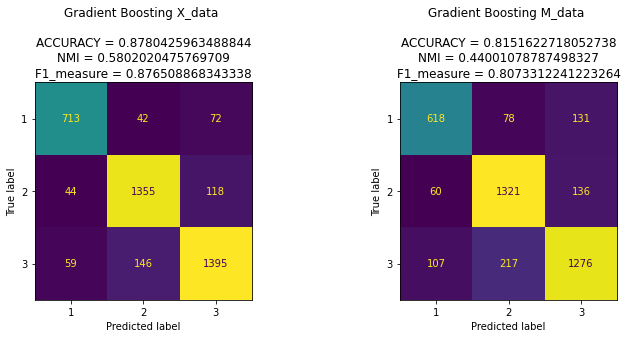

In [ ]:
#Confusion matrix Gradient Boosting
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Gradient Boosting X_data \n\n"+"ACCURACY = "+str(gb_ac)+"\nNMI = "+str(gb_nmi)+"\nF1_measure = "+str(gb_f1))
axes[1].set_title("Gradient Boosting M_data \n\n"+"ACCURACY = "+str(gb_acM)+"\nNMI = "+str(gb_nmiM)+"\nF1_measure = "+str(gb_f1M))
plot_confusion_matrix(clf_gb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_gbM,x_testM,y_testM,ax=axes[1],colorbar=False)

##Xgboost

In [ ]:
#X(fea)
clf_xgb = xgboost.XGBClassifier(n_jobs=1)
clf_xgb.fit(x_train,y_train)
y_pred = clf_xgb.predict(x_test)
xgb_ac=accuracy_score(y_test,y_pred)
xgb_f1=f1_score(y_test,y_pred,average="macro")
xgb_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"Xgboost","ACCURACY":xgb_ac,"NMI":xgb_nmi,"F-measure":xgb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_xgbM = xgboost.XGBClassifier(n_jobs=1)
clf_xgbM.fit(x_trainM,y_trainM)
y_predM = clf_gbM.predict(x_testM)
xgb_acM=accuracy_score(y_testM,y_predM)
xgb_f1M=f1_score(y_testM,y_predM,average="macro")
xgb_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"Xgboost","ACCURACY":xgb_acM,"NMI":xgb_nmiM,"F-measure":xgb_f1M},ignore_index=True)

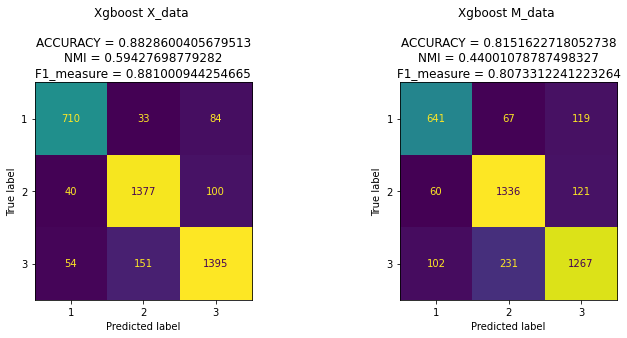

In [ ]:
#Confusion matrix Gradient Boosting
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("Xgboost X_data \n\n"+"ACCURACY = "+str(xgb_ac)+"\nNMI = "+str(xgb_nmi)+"\nF1_measure = "+str(xgb_f1))
axes[1].set_title("Xgboost M_data \n\n"+"ACCURACY = "+str(xgb_acM)+"\nNMI = "+str(xgb_nmiM)+"\nF1_measure = "+str(xgb_f1M))
plot_confusion_matrix(clf_xgb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_xgbM,x_testM,y_testM,ax=axes[1],colorbar=False)

##AdaBoost

In [ ]:
#X(fea)
clf_adb = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_adb.fit(x_train,y_train)
y_pred = clf_adb.predict(x_test)
adb_ac=accuracy_score(y_test,y_pred)
adb_f1=f1_score(y_test,y_pred,average="macro")
adb_nmi=NMI(y_test,y_pred)
pubmed_metricsX=pubmed_metricsX.append({"method":"AdaBoost","ACCURACY":adb_ac,"NMI":adb_nmi,"F-measure":adb_f1},ignore_index=True)

In [ ]:
#M=D^(-1)*W*X
clf_adbM = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_adbM.fit(x_trainM,y_trainM)
y_predM = clf_adbM.predict(x_testM)
adb_acM=accuracy_score(y_testM,y_predM)
adb_f1M=f1_score(y_testM,y_predM,average="macro")
adb_nmiM=NMI(y_testM,y_predM)
pubmed_metricsM=pubmed_metricsM.append({"method":"AdaBoost","ACCURACY":adb_acM,"NMI":adb_nmiM,"F-measure":adb_f1M},ignore_index=True)

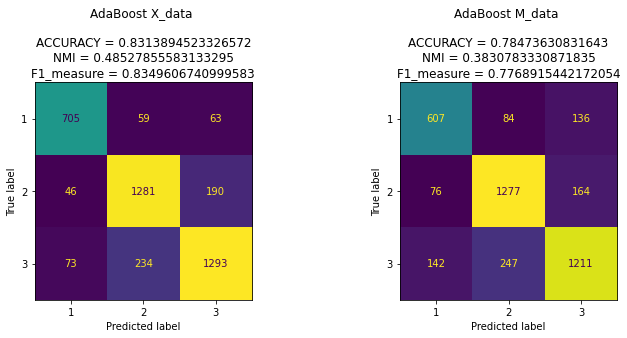

In [ ]:
#Confusion matrix Random Forest
f,axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].set_title("AdaBoost X_data \n\n"+"ACCURACY = "+str(adb_ac)+"\nNMI = "+str(adb_nmi)+"\nF1_measure = "+str(adb_f1))
axes[1].set_title("AdaBoost M_data \n\n"+"ACCURACY = "+str(adb_acM)+"\nNMI = "+str(adb_nmiM)+"\nF1_measure = "+str(adb_f1M))
plot_confusion_matrix(clf_adb,x_test,y_test,ax=axes[0],colorbar=False)
plot_confusion_matrix(clf_adbM,x_testM,y_testM,ax=axes[1],colorbar=False)

#Pubmed Resultats et commentaires 

Text(0.5, 1.0, '\n\nComparaison entre les modèles M-DATA ')

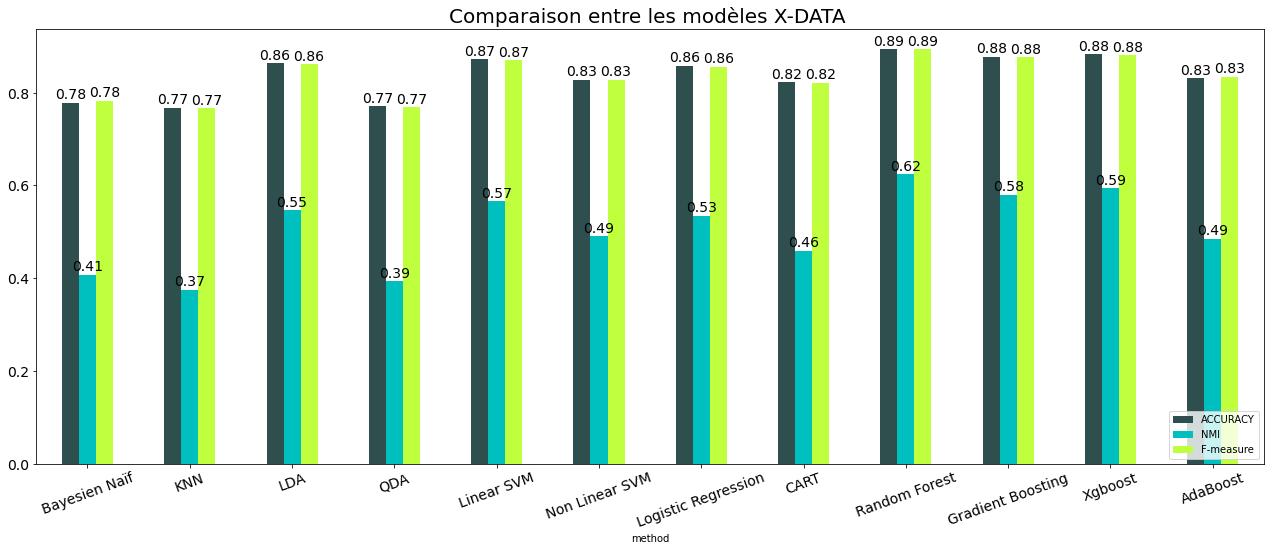

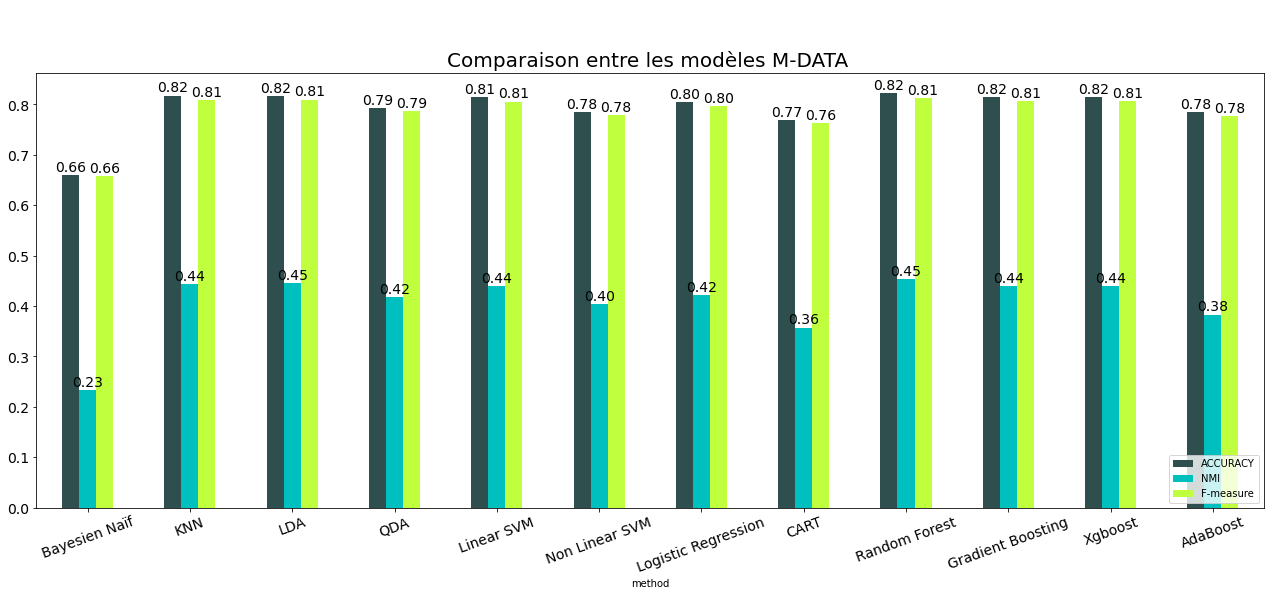

In [ ]:
#X_DATA Metrics
result=pubmed_metricsX.set_index("method")
r=result.plot(kind='bar',figsize=(22,8),color = ['darkslategrey', 'c',"#C0FF3E"],rot=20,fontsize=14)
for p in r.patches:
    r.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,8), 
                   textcoords = 'offset points',
                   fontsize=14)
plt.legend(loc=4)
plt.title('Comparaison entre les modèles X-DATA ',fontsize=20)

#M_DATA Metrics 
result=pubmed_metricsM.set_index("method")
r=result.plot(kind='bar',figsize=(22,8),color = ['darkslategrey', 'c',"#C0FF3E"],rot=20,fontsize=14)
for p in r.patches:
    r.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0,8), 
                   textcoords = 'offset points',
                   fontsize=14)
plt.legend(loc=4)
plt.title('\n\nComparaison entre les modèles M-DATA ',fontsize=20)


D'apres le Barplot :

*  Les classifieurs sur la matrices X donnent des resultats mieux la matrice M
*  Random forest et Xgboost sont les deux meilleurs models
*  Bayesien Naif donne les resultats les plus mediocres parmi les differents classifieurs